<a href="https://colab.research.google.com/github/Manikandan-professional/Miscellaneous/blob/main/G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Necessary packages required**

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# **Excel to DataFrame Conversion**

In [85]:
link_Dataset='https://raw.githubusercontent.com/Manikandan-professional/Miscellaneous/main/train.csv'
link_Dataset_csv=pd.read_csv(link_Dataset)
df=pd.DataFrame(link_Dataset_csv)
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000
7105,P09794,Velachery,1896,13-07-2005,156,3.0,2.0,5,Partial,Yes,24-07-1961,Others,ELO,Paved,I,3.1,3.5,4.3,3.640,349177,79812,9976480
7106,P09293,T Nagar,1973,29-01-2007,63,2.0,1.0,5,Family,Yes,07-02-1972,Commercial,AllPub,Gravel,RM,2.6,2.9,4.9,3.710,885666,116535,23307000
7107,P09021,Chrompet,1023,11-05-2007,44,1.0,1.0,3,Partial,Yes,15-05-1990,House,AllPub,Pavd,RM,3.0,2.8,3.6,3.100,282319,38941,9735150


# **Table Format of Column Names**

***The Below script gives us the column names available in the dataset given to us***

In [86]:
for i in range(0,df.shape[1],1):
  if i%2==0:
      print(i+1,'.',df.columns[i],' (',df.dtypes[df.columns[i]],') ',end="-------------------")
  else:
      print(i+1,'.',df.columns[i],' (',df.dtypes[df.columns[i]],') ')
      print()

1 . PRT_ID  ( object ) -------------------2 . AREA  ( object ) 

3 . INT_SQFT  ( int64 ) -------------------4 . DATE_SALE  ( object ) 

5 . DIST_MAINROAD  ( int64 ) -------------------6 . N_BEDROOM  ( float64 ) 

7 . N_BATHROOM  ( float64 ) -------------------8 . N_ROOM  ( int64 ) 

9 . SALE_COND  ( object ) -------------------10 . PARK_FACIL  ( object ) 

11 . DATE_BUILD  ( object ) -------------------12 . BUILDTYPE  ( object ) 

13 . UTILITY_AVAIL  ( object ) -------------------14 . STREET  ( object ) 

15 . MZZONE  ( object ) -------------------16 . QS_ROOMS  ( float64 ) 

17 . QS_BATHROOM  ( float64 ) -------------------18 . QS_BEDROOM  ( float64 ) 

19 . QS_OVERALL  ( float64 ) -------------------20 . REG_FEE  ( int64 ) 

21 . COMMIS  ( int64 ) -------------------22 . SALES_PRICE  ( int64 ) 



# **Table Format of Null Values**

***This is a representation of Null values using the table format for easier view***

In [87]:
l1=[]
print('***********************************************')
print()
print('Name of the Column   |   Number of Null Values')
print()
for i in range(0,df.shape[1],1):
  if df[df.columns[i]].isnull().sum()>0: # Taking only the null values  
    l1.append(df.columns[i])
    print('***********************************************')
    print()
    print(df.columns[i],'                    ',df[df.columns[i]].isnull().sum())
    print()
print('***********************************************')

***********************************************

Name of the Column   |   Number of Null Values

***********************************************

N_BEDROOM                      1

***********************************************

N_BATHROOM                      5

***********************************************

QS_OVERALL                      48

***********************************************


# **Handling of Null Values**

***This particular block is used to make our decision about the Null values***

In [88]:
for i in range(0,len(l1),1):
  print('****************************************************************')
  print('Name of the Column is:                             ',l1[i])
  print('Number of Rows in',l1[i],'Column is:              ',df.shape[0])
  print('Number of Missing values in',l1[i],'Column is:      ',df[l1[i]].isnull().sum())
  print('Percentage of Missing values in',l1[i],'Column is: ',round((df[l1[i]].isnull().sum()/df.shape[0])*100,2))
print('*****************************************************************')

****************************************************************
Name of the Column is:                              N_BEDROOM
Number of Rows in N_BEDROOM Column is:               7109
Number of Missing values in N_BEDROOM Column is:       1
Percentage of Missing values in N_BEDROOM Column is:  0.01
****************************************************************
Name of the Column is:                              N_BATHROOM
Number of Rows in N_BATHROOM Column is:               7109
Number of Missing values in N_BATHROOM Column is:       5
Percentage of Missing values in N_BATHROOM Column is:  0.07
****************************************************************
Name of the Column is:                              QS_OVERALL
Number of Rows in QS_OVERALL Column is:               7109
Number of Missing values in QS_OVERALL Column is:       48
Percentage of Missing values in QS_OVERALL Column is:  0.68
*****************************************************************


# **Decision Execution - Null Values**

***1. Since there are 0.01% missing values in N_Bedroom this can be removed as we are going to loose only one row, for N_Bathroom there are 5 rows which has missing values with 0.07% missing from the rows this can also be removed. And finally QS_Overall has 0.68% missing data with 48 rows. Total of 0.74 missing values in the whole dataset and droping it will not make any difference in the dataset***

**Droping the Null values**



In [89]:
print('Number of Rows BEFORE droping the Null values rows: ',df.shape[0])
a=df.shape[0]
df=df.dropna(axis=0)
print('Number of Rows AFTER droping the Null values rows: ',df.shape[0])
b=df.shape[0]
print('Percentage of removed value is: ',100-((b/a)*100))
print('Percentage of removed value is: ',(b/a)*100)

Number of Rows BEFORE droping the Null values rows:  7109
Number of Rows AFTER droping the Null values rows:  7056
Percentage of removed value is:  0.7455338303558818
Percentage of removed value is:  99.25446616964412


# **Decision Execution - Removing the Unwanted Column or Less information Columns**

In [90]:
df=df.drop(columns=['PRT_ID','SALE_COND','MZZONE','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS'],axis=1)

# **Information about the Cleaned Data**

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7056 non-null   object 
 1   INT_SQFT       7056 non-null   int64  
 2   DATE_SALE      7056 non-null   object 
 3   DIST_MAINROAD  7056 non-null   int64  
 4   N_BEDROOM      7056 non-null   float64
 5   N_BATHROOM     7056 non-null   float64
 6   N_ROOM         7056 non-null   int64  
 7   PARK_FACIL     7056 non-null   object 
 8   DATE_BUILD     7056 non-null   object 
 9   BUILDTYPE      7056 non-null   object 
 10  UTILITY_AVAIL  7056 non-null   object 
 11  STREET         7056 non-null   object 
 12  SALES_PRICE    7056 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 771.8+ KB


# **Description about the Cleaned Data**

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7056.0,1.381317e+03,4.578609e+02,500.0,991.0,1369.5,1744.0,2500.0
DIST_MAINROAD,7056.0,9.956916e+01,5.740387e+01,0.0,50.0,99.0,148.0,200.0
N_BEDROOM,7056.0,1.636621e+00,8.036325e-01,1.0,1.0,1.0,2.0,4.0
N_BATHROOM,7056.0,1.213152e+00,4.095631e-01,1.0,1.0,1.0,1.0,2.0
N_ROOM,7056.0,3.686650e+00,1.020011e+00,2.0,3.0,4.0,4.0,6.0
SALES_PRICE,7056.0,1.088801e+07,3.769081e+06,2156875.0,8266790.0,10319225.0,12981477.5,23667340.0


# **Preview of the Cleaned Data**

In [93]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,Yes,15-05-1967,Commercial,AllPub,Paved,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,No,22-12-1995,Commercial,AllPub,Gravel,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,Yes,09-02-1992,Commercial,ELO,Gravel,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,No,18-03-1988,Others,NoSewr,Paved,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,Yes,13-10-1979,Others,AllPub,Gravel,7406250


#**Area Analysis**

In [94]:
l2=list(df['AREA'].unique())
print('***********************************************************************')
for i in range(0,len(l2),1):
  print()
  print(l2[i],'------->',df[df['AREA']==l2[i]].shape)
  print('Number of properties in the dataset with ',l2[i],'as Area is: ',df[df['AREA']==l2[i]].shape[0])
  print()
  print('***********************************************************************')


***********************************************************************

Karapakkam -------> (1356, 13)
Number of properties in the dataset with  Karapakkam as Area is:  1356

***********************************************************************

Anna Nagar -------> (772, 13)
Number of properties in the dataset with  Anna Nagar as Area is:  772

***********************************************************************

Adyar -------> (768, 13)
Number of properties in the dataset with  Adyar as Area is:  768

***********************************************************************

Velachery -------> (973, 13)
Number of properties in the dataset with  Velachery as Area is:  973

***********************************************************************

Chrompet -------> (1671, 13)
Number of properties in the dataset with  Chrompet as Area is:  1671

***********************************************************************

KK Nagar -------> (989, 13)
Number of properties in the dataset with 

#**INT_SQFT Analysis**

In [95]:
l3=[]
for i in range(0,len(l2),1):
  print()
  print(l2[i],'------> Minimum Int_SquareFeet value is: ',df[df['AREA']==l2[i]]['INT_SQFT'].min(),end=" **** ")
  
  print('Maximum Int_SquareFeet value is: ',df[df['AREA']==l2[i]]['INT_SQFT'].max(),end=" **** ")
  
  print('Average Int_SquareFeet value is: ',df[df['AREA']==l2[i]]['INT_SQFT'].mean())
  print()
  print('***********************************************************************************************************************************************************************')
 


Karapakkam ------> Minimum Int_SquareFeet value is:  500 **** Maximum Int_SquareFeet value is:  1699 **** Average Int_SquareFeet value is:  1103.4638643067847

***********************************************************************************************************************************************************************

Anna Nagar ------> Minimum Int_SquareFeet value is:  1501 **** Maximum Int_SquareFeet value is:  2000 **** Average Int_SquareFeet value is:  1752.0608808290156

***********************************************************************************************************************************************************************

Adyar ------> Minimum Int_SquareFeet value is:  600 **** Maximum Int_SquareFeet value is:  1300 **** Average Int_SquareFeet value is:  957.5377604166666

***********************************************************************************************************************************************************************

Velachery ------>

#**DATE_SALE Analysis**

#**DIST_MAINROAD Analysis**

#**Area Analysis**

#**Area Analysis**

# Variables Used
1. 

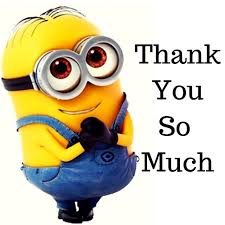